# 텍스트 전처리 기초 1

220526


## 1) Read data

txt, csv 데이터 읽기

In [ ]:
# data check
!ls

sample_data  wiki_20190620_small.txt


['제임스 얼 "지미" 카터 주니어는 민주당 출신 미국 39번째 대통령 이다.\n', '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.\n']

  =>  ['제임스 얼 "지미" 카터 주니어는 민주당 출신 미국 39번째 대통령 이다.\n', '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.\n']

코퍼스 문장수/평균/총 단어 갯수 : 149998, 13.7 / 2053935


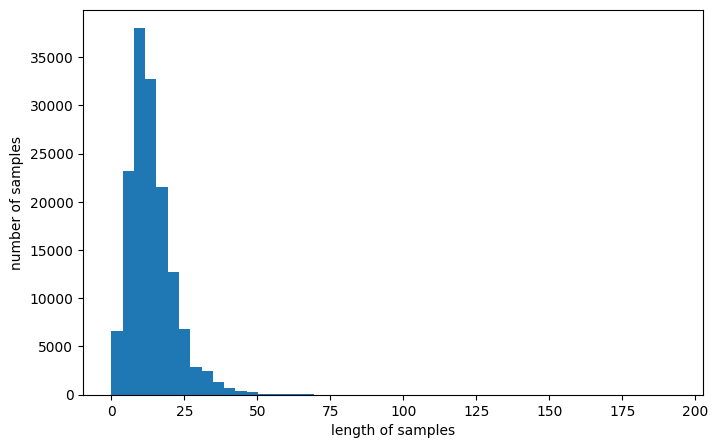

In [ ]:
## 1.1) read text data
# 한국어 위키 데이터 load
with open('./wiki_20190620_small.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    print(lines[:2])

    # '\n' 제거
    lines_wiki = [tmp.strip() for tmp in lines]
    print('\n  => ', lines[:2])

num_word_list = [len(sentence.split()) for sentence in lines_wiki]
print('\n코퍼스 문장수/평균/총 단어 갯수 : %d, %.1f / %d' % (len(num_word_list), sum(num_word_list)/len(num_word_list), sum(num_word_list)))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(num_word_list, bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

[('굳 ㅋ', 1), ('GDNTOPCLASSINTHECLUB', 0)]
data loading done!
sentence: ['굳 ㅋ', 'GDNTOPCLASSINTHECLUB', '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아']
Label   : [1, 0, 0]

코퍼스 문장수/평균/총 단어 갯수 : 49997, 7.6 / 380472


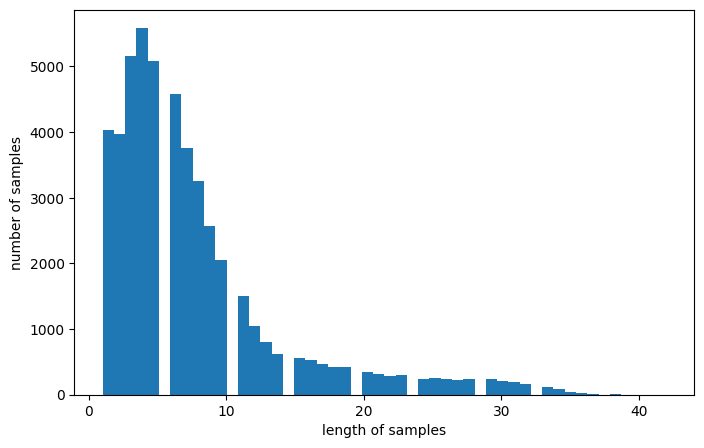

In [ ]:
## 1.2) read csv data
# NSMC 데이터 로드
import pandas as pd
# data_nsmc = pd.read_csv('data/nsmc.txt', sep='\t')
data_nsmc = pd.read_table('https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_pair = [(row[1], row[2]) for _, row in data_nsmc.iterrows() if type(row[1]) == str]  # nan 제거
print(train_pair[:2])

#  문장 및 라벨 데이터 추출
train_data  = [pair[0] for pair in train_pair]
train_label = [pair[1] for pair in train_pair]
print('data loading done!')
print('sentence: %s' %(train_data[:3]))
print('Label   : %s' %(train_label[:3]))

num_word_list = [len(sentence.split()) for sentence in train_data]
print('\n코퍼스 문장수/평균/총 단어 갯수 : %d, %.1f / %d' % (len(num_word_list), sum(num_word_list)/len(num_word_list), sum(num_word_list)))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(num_word_list, bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 2) 문장 분리

여러 문장이 이어져 있을 때, 한 문장 단위로 분리한다

In [ ]:
# 한국어 문장분리 라이브러리 설치
!pip install kss
!pip install kiwipiepy

  Using cached kss-4.5.4.tar.gz (79 kB)
  Preparing metadata (setup.py) ... done
  Using cached emoji-1.2.0-py3-none-any.whl (131 kB)
  Using cached pecab-1.0.8.tar.gz (26.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for kss: filename=kss-4.5.4-py3-none-any.whl size=54464 sha256=382ddb3beecc03bf85051c1e9f49defd0161b2491b8bed32bd6f082d151233d7
  Stored in directory: /root/.cache/pip/wheels/61/7b/ba/e620ef5d96a61cdd83bdee4c2bb4aec8a74de5d72fcbb00e80
  Created wheel for pecab: filename=pecab-1.0.8-py3-none-any.whl size=26646665 sha256=de1f789fe26e72e13e1d5483773252bb2f7c727d03f8ad006bf646acec094ed3
  Stored in directory: /root/.cache/pip/wheels/5c/6f/b4/ab61b8863d7d8b1409def8ae31adcaa089fa91b8d022ec309d
Successfully built kss pecab


In [ ]:
## 2.1) kss를 이용한 문장분리
import kss

sentences = '자연어처리 공부를 시작해 볼까요? 텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다. 하지만 우리 포기하지 말고 끝까지 공부해봐요!!'

resut_kss = kss.split_sentences(sentences)

sentence_tokenized_text = []
for sent in resut_kss:
    sentence_tokenized_text.append(sent.strip())

print(sentences, '\n=>')
for tmp in sentence_tokenized_text:
    print(tmp)

For your information, Kss also supports mecab backend.
We recommend you to install mecab or konlpy.tag.Mecab for faster execution of Kss.
Please refer to following web sites for details:
- mecab: https://github.com/hyunwoongko/python-mecab-kor
- konlpy.tag.Mecab: https://konlpy.org/en/latest/api/konlpy.tag/#mecab-class



자연어처리 공부를 시작해 볼까요? 텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다. 하지만 우리 포기하지 말고 끝까지 공부해봐요!! 
=>
자연어처리 공부를 시작해 볼까요?
텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다.
하지만 우리 포기하지 말고 끝까지 공부해봐요!!


In [ ]:
## 2.1) kiwi를 이용한 문장분리
from kiwipiepy import Kiwi
kiwi = Kiwi()

sentences = '자연어처리 공부를 시작해 볼까요? 텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다. 하지만 우리 포기하지 말고 끝까지 공부해봐요!!'

result_kiwi = kiwi.split_into_sents(sentences)
sentence_tokenized_text = []
for sent in result_kiwi:
    sentence_tokenized_text.append(sent.text)

print(sentences, '\n=>')
for tmp in sentence_tokenized_text:
    print(tmp)

자연어처리 공부를 시작해 볼까요? 텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다. 하지만 우리 포기하지 말고 끝까지 공부해봐요!! 
=>
자연어처리 공부를 시작해 볼까요?
텍스트는 비정형 데이터로 정형화 하기 위해 많은 노력이 필요합니다.
하지만 우리 포기하지 말고 끝까지 공부해봐요!!


In [ ]:
## 2.3) 결과 비교
tmp_data = train_data[:100]

print('#'*50)
print('문장 분리 적용 전')
print(tmp_data[8])

num_word_list = [len(sentence.split()) for sentence in tmp_data]
print('\n코퍼스 문장수/평균/총 단어 갯수 : %d, %.1f / %d' % (len(num_word_list), sum(num_word_list)/len(num_word_list), sum(num_word_list)))

print('#'*50)
print('문장 분리 적용 후')
tokenized_text = []
for sentences in tmp_data:
    result_kiwi = kiwi.split_into_sents(sentences)
    sentence_tokenized_text = [sent.text for sent in result_kiwi]

    tokenized_text.extend(sentence_tokenized_text)

print(tokenized_text[12:14])
num_word_list = [len(sentence.split()) for sentence in tokenized_text]
print('\n코퍼스 문장수/평균/총 단어 갯수 : %d, %.1f / %d' % (len(num_word_list), sum(num_word_list)/len(num_word_list), sum(num_word_list)))

##################################################
문장 분리 적용 전
갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다

코퍼스 문장수/평균/총 단어 갯수 : 100, 7.3 / 726
##################################################
문장 분리 적용 후
['갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남', '말도안되는 무기에 유치한cg남무 아 그립다']

코퍼스 문장수/평균/총 단어 갯수 : 168, 4.4 / 747


## 3) 문장 기본 정제

noisy한 문장을 깨끗이 전처리 한다

In [ ]:
list_sentence = tokenized_text[:20]
list_sentence

['굳 ㅋ',
 'GDNTOPCLASSINTHECLUB',
 '뭐야',
 '이 평점들은....',
 '나쁘진 않지만 10점 짜리는 더더욱 아니잖아',
 '지루하지는 않은데 완전 막장임...',
 '돈주고 보기에는....',
 '3D만 아니었어도 별 다섯 개 줬을텐데..',
 '왜 3D로 나와서 제 심기를 불편하게 하죠??',
 '음악이 주가 된, 최고의 음악영화',
 '진정한 쓰레기',
 '마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다',
 '갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남',
 '말도안되는 무기에 유치한cg남무 아 그립다',
 '동사서독같은 영화가 이건 3류아류작이다',
 '이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..',
 '괜찮네요',
 '오랜만포켓몬스터잼밌어요',
 '한국독립영화의 한계 그렇게 아버지가 된다와 비교됨',
 '청춘은 아름답다']

In [ ]:
string_sentence = '\n'.join(train_data[:1000])
string_sentence[:200]

'굳 ㅋ\nGDNTOPCLASSINTHECLUB\n뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아\n지루하지는 않은데 완전 막장임... 돈주고 보기에는....\n3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??\n음악이 주가 된, 최고의 음악영화\n진정한 쓰레기\n마치 미국애니에서 튀어나온듯한 창의력없는 로봇디'

In [ ]:
# 키보드로 칠수 없는 문자열 필터링
import re
pattern = '[\n\t 0-9a-zA-Z가-힣ㅏ-ㅣ\~`!@#$%^&*\(\)-_=+\[\{\}\]\}|;:\'\",.\<\>/?·]'
tmp = re.sub(pattern , '', string_sentence)
have_to_remove_char = sorted(list(set(list(tmp))))
print('걸러진 이상한 문자들 갯수 : %d'%(len(have_to_remove_char)))
print(have_to_remove_char)

걸러진 이상한 문자들 갯수 : 23
['‘', '’', '☆', '♡', '♥', 'ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅅ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅎ', '乃', '無', '用', '＼']


In [ ]:
# text cleansing
def clean_punc(text):
    mapping = {"‘": "'",
                     "’": "'",
                     "無":"무",
                     "用":"용",
                     "☆":"-",
                     "♡":"-",
                     "♥":"-"}
    for p in mapping:
        text = text.replace(p, mapping[p])

    specials_word = {'\u200b': ' ', '…': ' ... ', '\ufeff': ''}
    for s in specials_word:
        text = text.replace(s, specials_word[s])

    return text.strip()

cleansed_sentence = []
for sent in list_sentence:
    cleansed_sentence.append(clean_punc(sent))

string_cleansed_sentence = '\n'.join(cleansed_sentence)

In [ ]:
string_sentence[:200]

'굳 ㅋ\nGDNTOPCLASSINTHECLUB\n뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아\n지루하지는 않은데 완전 막장임... 돈주고 보기에는....\n3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??\n음악이 주가 된, 최고의 음악영화\n진정한 쓰레기\n마치 미국애니에서 튀어나온듯한 창의력없는 로봇디'

In [ ]:
# cleansing text 체크
import re
pattern = '[\n\t 0-9a-zA-Z가-힣ㅏ-ㅣ\~`!@#$%^&*\(\)-_=+\[\{\}\]\}|;:\'\",.\<\>/?·]'
tmp = re.sub(pattern , '', string_cleansed_sentence)
have_to_remove_char = sorted(list(set(list(tmp))))
print('걸러진 이상한 문자들 갯수 : %d'%(len(have_to_remove_char)))
print(have_to_remove_char)

걸러진 이상한 문자들 갯수 : 1
['ㅋ']


In [ ]:
# clean more
import re

def clean_text(texts):
    list_cleansed_txt = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
#         review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        list_cleansed_txt.append(review)
    return list_cleansed_txt

basic_preprocessed_txt = clean_text(cleansed_sentence)
for i in range(0, 10):
    print(basic_preprocessed_txt[i])

굳 ㅋ
gdntopclassintheclub
뭐야
이 평점들은
나쁘진 않지만 10점 짜리는 더더욱 아니잖아
지루하지는 않은데 완전 막장임
돈주고 보기에는
3d만 아니었어도 별 다섯 개 줬을텐데
왜 3d로 나와서 제 심기를 불편하게 하죠
음악이 주가 된 최고의 음악영화


## 4) 문장 고급 정제

- 4.1) [띄어쓰기 검사](https://github.com/haven-jeon/PyKoSpacing)
- 4.2) [맞춤법 검사](https://github.com/ssut/py-hanspell)
- 4.3) [반복되는 이모티콘/자소 필터링](https://github.com/lovit/soynlp)
- 4.4) [외래어 사전](https://link.springer.com/chapter/10.1007/978-3-030-12385-7_3)

#### 4.1) 띄어쓰기 검사

##### 한국어 띄어쓰기

- 한국어에선 띄어쓰기가 잘 지켜지지 않음
- 타 언어에 비해 띄어쓰기가 어렵고 잘 안지켜 짐
- 한국어의 경우 띄어쓰기가 없더라도 글을 쉽게 이해할 수 있는 언어

ex) 한국어의경우띄어쓰기가없더라도글을쉽게이해할수있는언어지??
ex) Wedonotstudynaturallanguageprocessingtoohard!!(We do not study natural language processing too hard!!)

- 한국어는 띄어쓰기 없이도 이해가 가능
- 하지만, 영어는 이해가 힘듦

In [ ]:
# install
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-68zpky39
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-68zpky39
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 04aeebcbe26b109486a642e57dc58665c4818cf3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 107.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 64.4 MB/s et

In [ ]:
from pykospacing import Spacing
spacing = Spacing()

In [ ]:
print(spacing("김형호영화시장분석가는'1987'의네이버영화정보네티즌10점평에서언급된단어들을지난해12월27일부터올해1월10일까지통계프로그램R과KoNLP패키지로텍스트마이닝하여분석했다."))

김형호 영화시장 분석가는 '1987'의 네이버 영화 정보 네티즌 10점 평에서 언급된 단어들을 지난해 12월 27일부터 올해 1월 10일까지 통계 프로그램 R과 KoNLP 패키지로 텍스트마이닝하여 분석했다.


In [ ]:
print(spacing('귀밑에서턱까지잇따라난수염을구레나룻이라고한다.'))

귀 밑에서 턱까지 잇따라 난 수염을 구레나 룻이라고 한다.


In [ ]:
spacing = Spacing(rules=['구레나룻'])
print(spacing('귀밑에서턱까지잇따라난수염을구레나룻이라고한다.'))

귀 밑에서 턱까지 잇따라 난 수염을 구레나룻이라고 한다.


In [ ]:
print(spacing('아버지가방에들어가신다.'))

아버지가 방에 들어가신다.


#### 4.2) 맞춤법 검사

In [ ]:
# install
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-zo670hi0
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-zo670hi0
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done


In [ ]:
from hanspell import spell_checker

sentence = '귀밑에서턱까지잇따라난수염을구레나룻이라고한다.'
result = spell_checker.check(sentence)
spell_checked_sentence = result.checked

print('## 띄어쓰기 검사\n\n%s\n  => %s'%(sentence, spell_checked_sentence))

KeyError: 'result'

In [ ]:
sentence = '아뉘 찐짜 재대로 정말 데채 무슨 말이쥐?'
result = spell_checker.check(sentence)
spell_checked_sentence = result.checked

print('## 맞춤법 검사\n\n%s\n  => %s'%(sentence, spell_checked_sentence))

#### 4.3) 반복되는 이모티콘/자소 필터링

In [ ]:
!pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
from soynlp.normalizer import *
sentence = 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ쿠ㅜㅜㅜㅜㅜㅜ'
print('%s  =>  %s'%(sentence, repeat_normalize(sentence, num_repeats=2)))

sentence = '꺄아아아아아하하핫핫핫핫핫핫'
print('%s  =>  %s'%(sentence, repeat_normalize(sentence, num_repeats=2)))

ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ쿠ㅜㅜㅜㅜㅜㅜ  =>  ㅋㅋ쿠ㅜㅜ
꺄아아아아아하하핫핫핫핫핫핫  =>  꺄아아하하핫핫


#### 4.4) 외래어 사전

In [ ]:
# download confused_loanwords.txt
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1RNYpLE-xbMCGtiEHIoNsCmfcyJP3kLYn" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1RNYpLE-xbMCGtiEHIoNsCmfcyJP3kLYn" -o confused_loanwords.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 19779  100 19779    0     0  12748      0  0:00:01  0:00:01 --:--:--  109k


In [ ]:
lownword_map = {}
lownword_data = open('./confused_loanwords.txt', 'r', encoding='utf-8')

lines = lownword_data.readlines()

for line in lines:
    line = line.strip()
    miss_spell = line.split('\t')[0]
    ori_word = line.split('\t')[1]
    lownword_map[miss_spell] = ori_word

for key in list(lownword_map.keys())[:5]:
    print('%s -> %s'%(key, lownword_map[key]))

가돌리니움 -> 가돌리늄
개돌리늄 -> 가돌리늄
개돌리니움 -> 가돌리늄
가드래일 -> 가드레일
가아드레일 -> 가드레일


#### 4.5) advanced 전처리 적용

In [ ]:
# 여러 고급 전처리 기법 적용
def advanced_preprocess_function(texts):
    preprocessed_txt = []
    for sent in texts:
        # 1) 띄어쓰기 검사
        spaced_text = spacing(sent)

        # 2) 맞춤법 검사
        spelled_sent = spell_checker.check(spaced_text).checked

        # 3) 반복되는 이모티콘/자소 필터링
        normalized_sent = repeat_normalize(spelled_sent)

        # 4) 외래어 사전
        for lownword in lownword_map:
            normalized_sent = normalized_sent.replace(lownword, lownword_map[lownword])

        preprocessed_txt.append(normalized_sent)
    return preprocessed_txt

preprocessed_txt = advanced_preprocess_function(basic_preprocessed_txt)

print('## advanced preprocessing')
print('%s\n  =>  %s'%(basic_preprocessed_txt[11], preprocessed_txt[11]))

KeyError: 'result'

# 전처리 완료!